In [171]:
import pandas as pd

url ='https://blast-recruiting.s3.eu-central-1.amazonaws.com/NAVIvsVitaGF-Nuke.txt'
df = pd.read_csv(url, skiprows=0, header=None, sep='\n+')

C:\Users\sinad\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [172]:
df2 = df.copy()

In [173]:
for i in range(0, len(df)):
    df[0][i] = df[0][i][13:]
    

In [174]:
time_row =[None] * 9172  
log_row = [None] * 9172  
for i in range(0, len(df)):
    time_row[i] = df[0][i][:8]
    log_row[i] = df[0][i][10:]

In [175]:
df_clean = pd.DataFrame()

In [176]:
df_clean['time'] = time_row
df_clean['log'] = log_row

In [177]:
df_clean

,time,log
0,20:26:14,"""electronic<20><BOT><>"" connected, address """""
1,20:26:14,"""electronic<20><BOT><>"" entered the game"
2,20:26:14,"""(1)GOTV<21><BOT><>"" connected, address """""
3,20:26:14,"""(1)GOTV<21><BOT><>"" entered the game"
4,20:26:14,"World triggered ""Round_Start"""
...,...,...
9167,21:31:37,Your server needs to be restarted in order to ...
9168,21:31:38,[FACEIT] Blocked map de_nuke reserved command
9169,21:31:38,"""misutaaa<36><STEAM_1:1:60631591><>"" connected..."
9170,21:31:38,"""misutaaa<36><STEAM_1:1:60631591><>"" disconnec..."


In [179]:
def calculate_dif(times):
    if times[0] == 'st' or times[1] == 'ed':
        raise Exception("list is not set")

    h_d = int(times[1][:2]) - int(times[0][:2])
    min_d = int(times[1][3:5]) - int(times[0][3:5])
    sec_d = int(times[1][6:9]) - int(times[0][6:9])
    
    k = h_d * 3600 + min_d * 60 + sec_d

    return k / 60

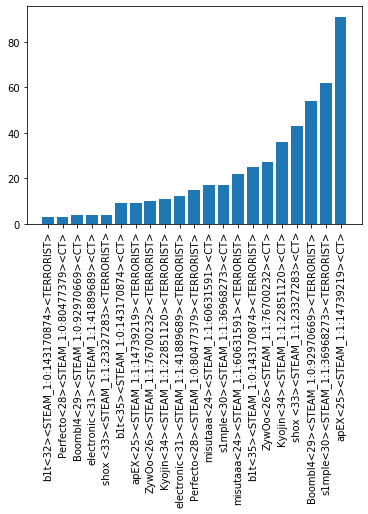

In [184]:
# Analyze the Killing stat

import re

dict_kill = dict()

for i in range(len(df_clean)):
    lg =  df_clean['log'][i]
    if 'killed' in lg:
        kill_data = re.findall('"([^"]*)"', lg)
        
        
        killer = kill_data[0] 
        victim = kill_data[1]
        weapon = kill_data[2]
        if killer in dict_kill:
            dict_kill[killer].append(victim)
        else:
            dict_kill[killer] = [victim]
        
# make a new dictionary that only holds the number of victims per each killer
d_k = dict();
for k, v in dict_kill.items():
    d_k[k] = len(v)
    
# Sort based on the number of victims (i.e the values of the dictionary)
sd_k = {k: v for k, v in sorted(d_k.items(), key=lambda item: item[1])}

# plot the dictionary in a bar chart

import matplotlib.pyplot as plt

D = sd_k
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xticks(rotation=90)

plt.show()

In [187]:
# Score board and average length of each Round

latest_round = ['st', 'ed']
rounds_len = []

scores = {'Terrorist_team':0, 'CT_team':0}

for i in range(len(df_clean)):
    lg =  df_clean['log'][i]
    if 'Round_Start' in lg:
        
        # record the start time
        latest_round[0] = df_clean['time'][i]
        
        # reset the score
        scores['Terrorist_team'] = 0
        scores['CT_team'] = 0
        
    if 'killed' in lg:
        kill_data = re.findall('"([^"]*)"', lg)
        
        
        killer = kill_data[0] 
        victim = kill_data[1]
        weapon = kill_data[2]
        
        if ('TERRORIST' in killer) and ('CT' in victim):
            scores['Terrorist_team'] += 1
        if ('TERRORIST' in victim) and ('CT' in killer):
            scores['CT_team'] += 1
            
            
    if 'Round_End'in lg:
        
        # Score board
        print('Round ', len(rounds_len) + 1," : ", scores)
        
        # reset the score
        scores['Terrorist_team'] = 0
        scores['CT_team'] = 0
        
        # record the end time
        latest_round[1] = df_clean['time'][i]
        
        # the difference between the time the round started and the time it ended
        cd = calculate_dif(latest_round)
        rounds_len.append(cd)
        
        # reset the timer
        latest_round = ['st', 'ed']

avg = sum(rounds_len)/len(rounds_len)
print("The average length of each round is ",avg, "Minutes")

Round  1  :  {'Terrorist_team': 2, 'CT_team': 5}
Round  2  :  {'Terrorist_team': 2, 'CT_team': 5}
Round  3  :  {'Terrorist_team': 2, 'CT_team': 5}
Round  4  :  {'Terrorist_team': 2, 'CT_team': 5}
Round  5  :  {'Terrorist_team': 3, 'CT_team': 5}
Round  6  :  {'Terrorist_team': 3, 'CT_team': 5}
Round  7  :  {'Terrorist_team': 4, 'CT_team': 2}
Round  8  :  {'Terrorist_team': 3, 'CT_team': 5}
Round  9  :  {'Terrorist_team': 3, 'CT_team': 5}
Round  10  :  {'Terrorist_team': 1, 'CT_team': 5}
Round  11  :  {'Terrorist_team': 3, 'CT_team': 1}
Round  12  :  {'Terrorist_team': 5, 'CT_team': 4}
Round  13  :  {'Terrorist_team': 3, 'CT_team': 5}
Round  14  :  {'Terrorist_team': 1, 'CT_team': 5}
Round  15  :  {'Terrorist_team': 5, 'CT_team': 1}
Round  16  :  {'Terrorist_team': 0, 'CT_team': 5}
Round  17  :  {'Terrorist_team': 0, 'CT_team': 5}
Round  18  :  {'Terrorist_team': 5, 'CT_team': 4}
Round  19  :  {'Terrorist_team': 5, 'CT_team': 2}
Round  20  :  {'Terrorist_team': 5, 'CT_team': 0}
Round  21